In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data_Pathrise.xlsx")
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [3]:
# some features has blank spaces in their names so we should remove spaces from the features name
df.columns = df.columns.str.strip()

In [4]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [5]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

### id

In [6]:
df['id'].value_counts()

1       1
1700    1
1693    1
1694    1
1695    1
       ..
849     1
850     1
851     1
852     1
2544    1
Name: id, Length: 2544, dtype: int64

In [7]:
df['id'].unique()

array([   1,    2,    3, ..., 2542, 2543, 2544], dtype=int64)

'id' should be droped since it has no effect in our result.

### pathrise_status 

In [8]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

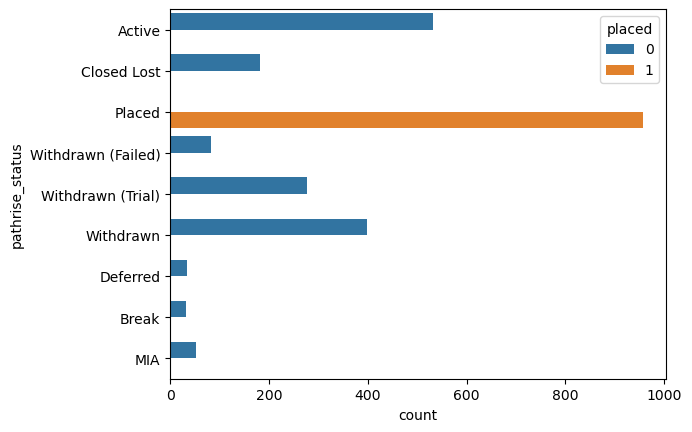

In [9]:
sns.countplot(y= 'pathrise_status', hue='placed', data=df,  orient='v')
plt.show()

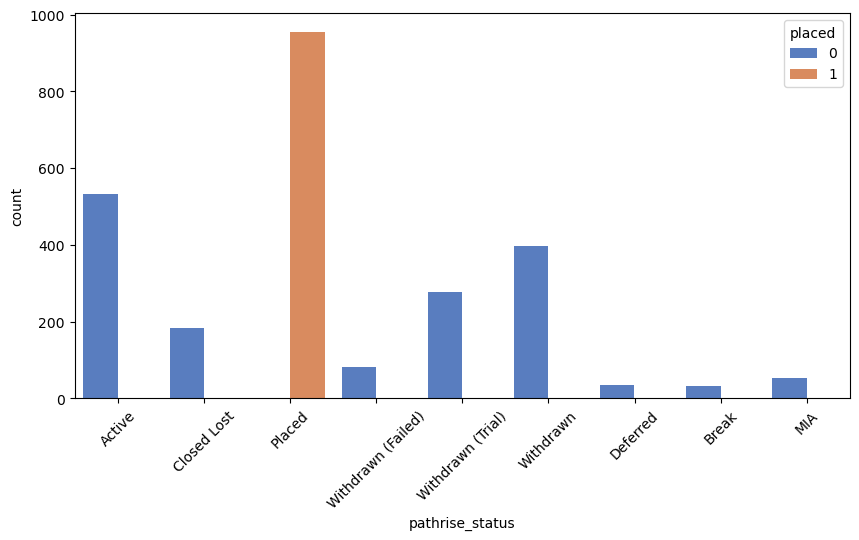

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='pathrise_status', hue='placed', palette='muted')

plt.xticks(rotation=45)

plt.show()

### primary_track

The "primary_track" column in the dataset indicates the primary career track that a Pathrise fellow has chosen to pursue. It is a categorical variable with several possible values, including:


In [11]:
df['primary_track'].value_counts()

SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64

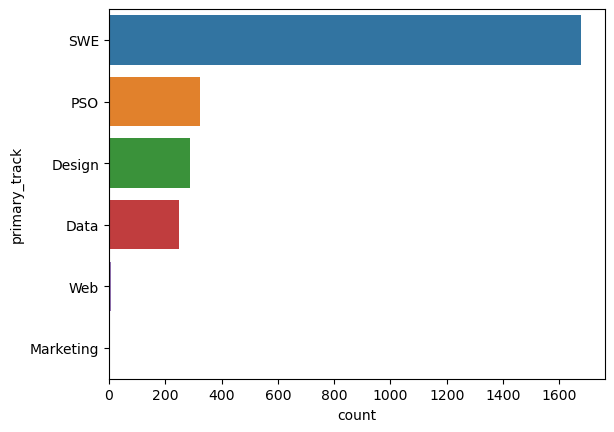

In [12]:
sns.countplot(y= 'primary_track', data=df,  orient='v')
plt.show()

### primary_track and placed

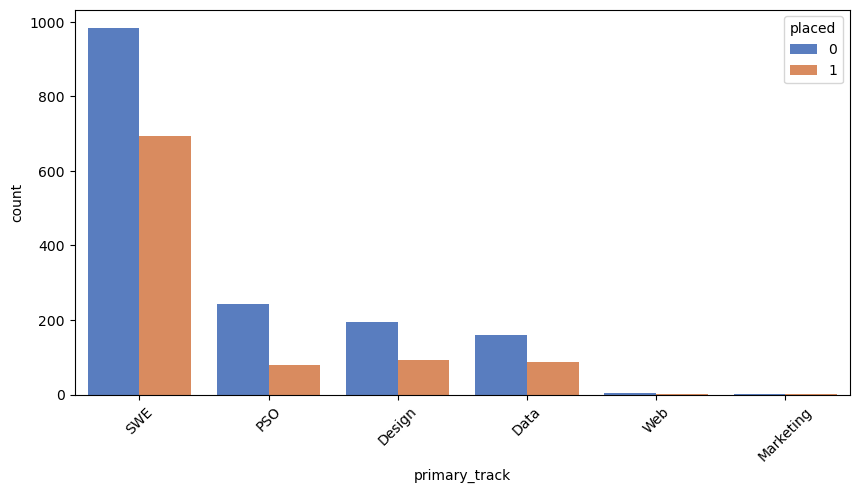

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='primary_track', hue='placed', palette='muted')

plt.xticks(rotation=45)

plt.show()

### cohort_tag

'cohort_tag' is a column in the Pathrise dataset that identifies the specific cohort to which a Pathrise fellow belongs. A cohort is a group of fellows who start the Pathrise program at the same time and progress through the program together. Each cohort is assigned a unique identifier in the 'cohort_tag' column, which consists of a combination of the month and year in which the cohort started, along with a sequential number.

In [14]:
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A', nan],
      dtype=object)

In [15]:
df['cohor_tag_month'] = df['cohort_tag'].str[:3]
df['cohor_tag_month'].unique()

array(['OCT', 'JAN', 'AUG', 'SEP', 'DEC', 'FEB', 'NOV', 'JUL', 'APR',
       'MAR', 'JUN', 'MAY', nan], dtype=object)

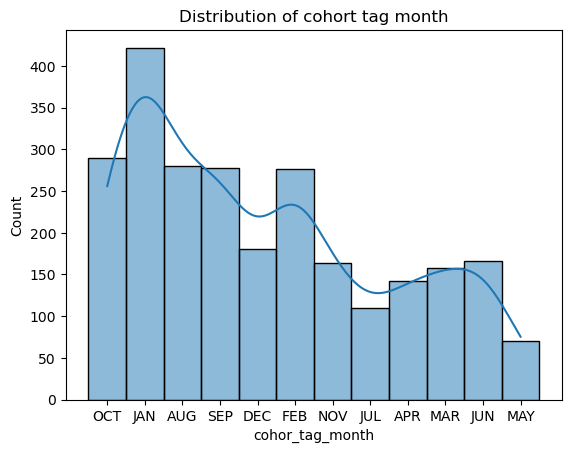

In [16]:
sns.histplot(data=df, x='cohor_tag_month', bins=20, kde=True)
plt.xlabel('cohor_tag_month')
plt.ylabel('Count')
plt.title('Distribution of cohort tag month')
plt.show()

### cohort_tag and placed

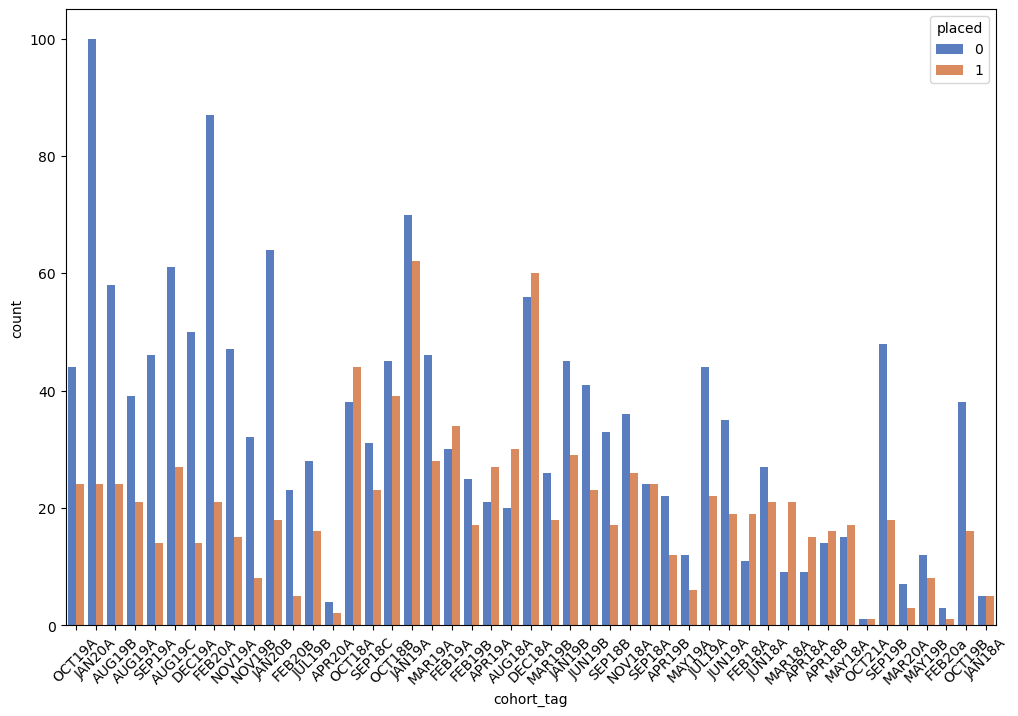

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x='cohort_tag', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

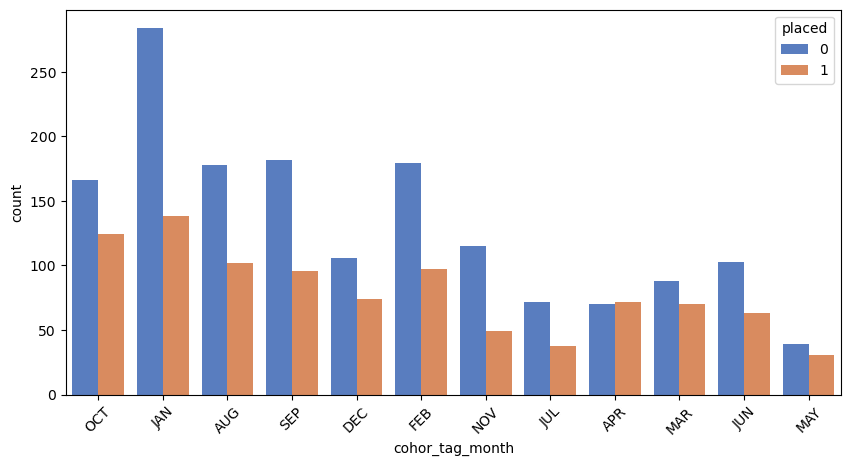

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='cohor_tag_month', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

The plot allows us to see the distribution of individuals across cohort months and their placement status. We can observe which months have a higher number of individuals and the proportion of individuals placed in each month.

### program_duration_days

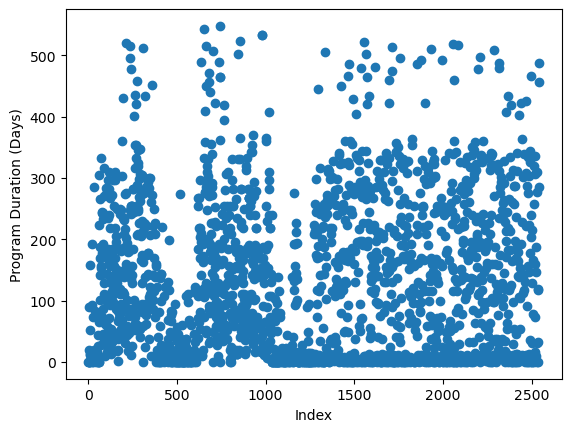

In [19]:
# Create a scatter plot of program_duration_days
plt.scatter(df.index, df['program_duration_days'])

plt.xlabel('Index')
plt.ylabel('Program Duration (Days)')

plt.show()

The scatter plot of 'program_duration_days' shows the distribution of program durations for each row in the Pathrise dataset.

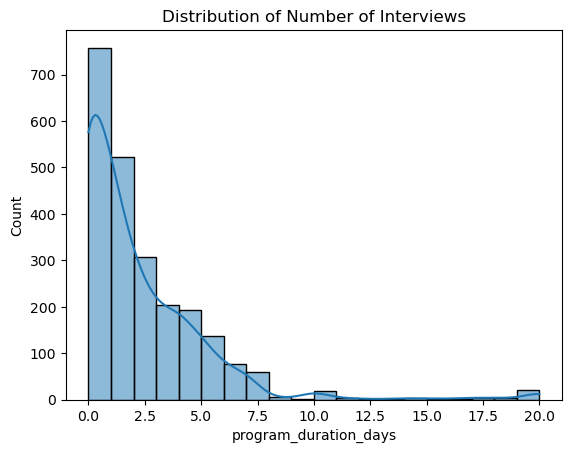

In [20]:
sns.histplot(data=df, x='number_of_interviews', bins=20, kde=True)
plt.xlabel('program_duration_days')
plt.ylabel('Count')
plt.title('Distribution of Number of Interviews')
plt.show()

### program_duration_days and placed

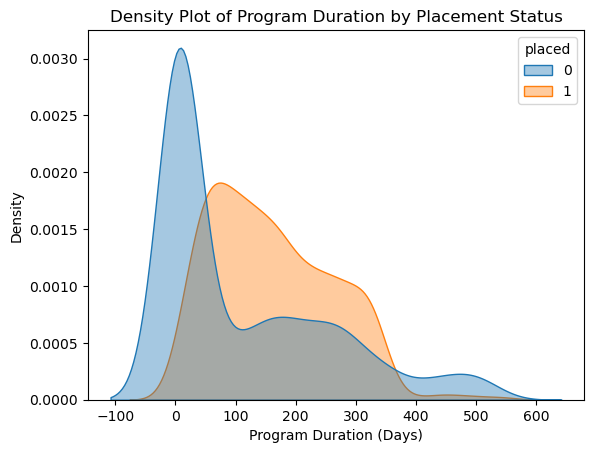

In [21]:
sns.kdeplot(data=df, x='program_duration_days', hue='placed', fill=True, alpha=0.4)
plt.xlabel('Program Duration (Days)')
plt.title('Density Plot of Program Duration by Placement Status')
plt.show()

The plot indicates that candidates who were placed tended to have shorter program durations, with the density peak being around 100-200 days. Candidates who were not placed had a wider distribution with the density peak being around 200-250 days.

### employment_status  

In [22]:
df['employment_status'].value_counts()

Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Contractor            170
Name: employment_status, dtype: int64

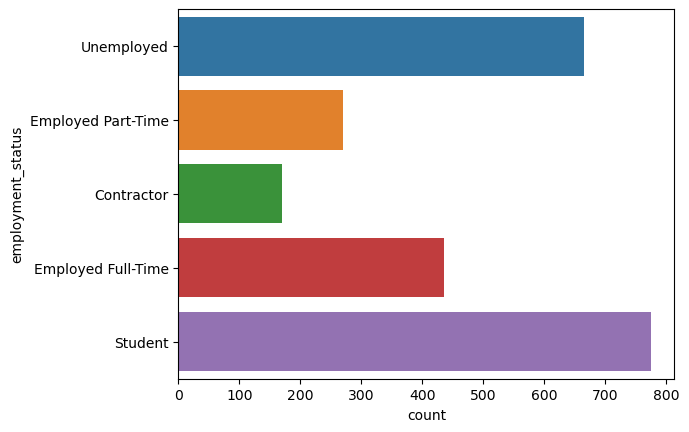

In [23]:
sns.countplot(y= 'employment_status', data=df,  orient='v')
plt.show()

From this plot, we can observe that the majority of participants in the program were students and unemployed when they started.

### employment_status and placed

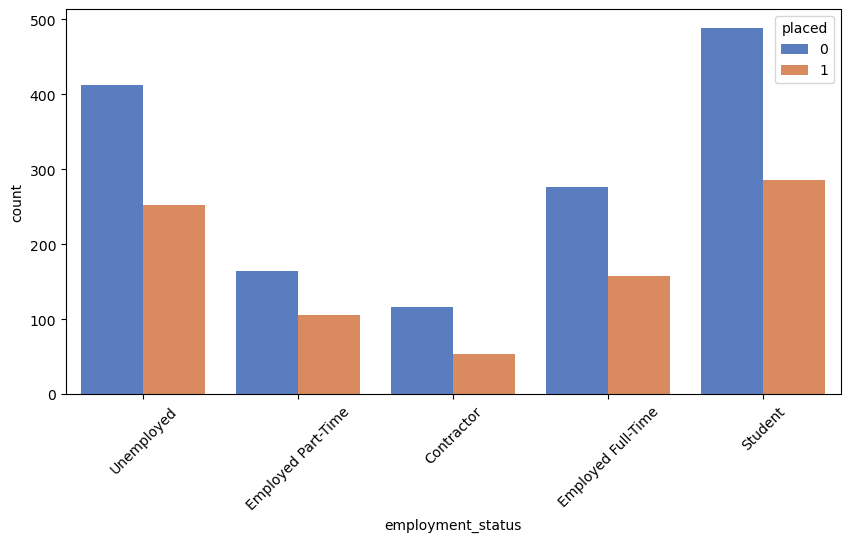

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='employment_status', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

This plot can help identify any trends or relationships between employment status and placement status, and can give insight into which employment status categories are more likely to result in job placement.

### highest_level_of_education 

highest level of education when joined the program

In [25]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

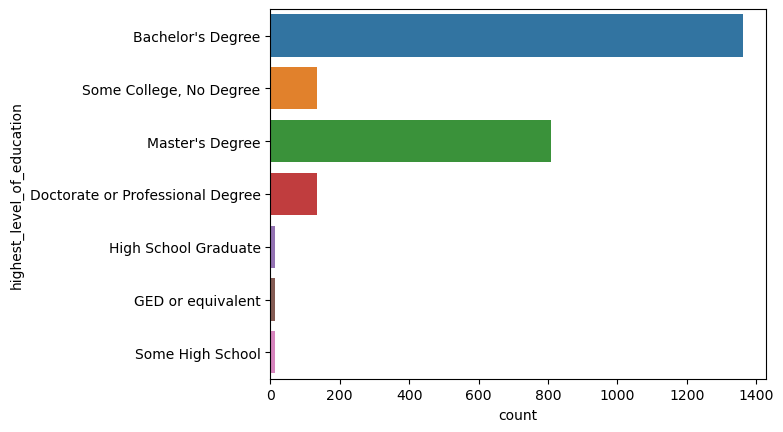

In [26]:
sns.countplot(y= 'highest_level_of_education', data=df,  orient='v')
plt.show()

### highest_level_of_education and placed

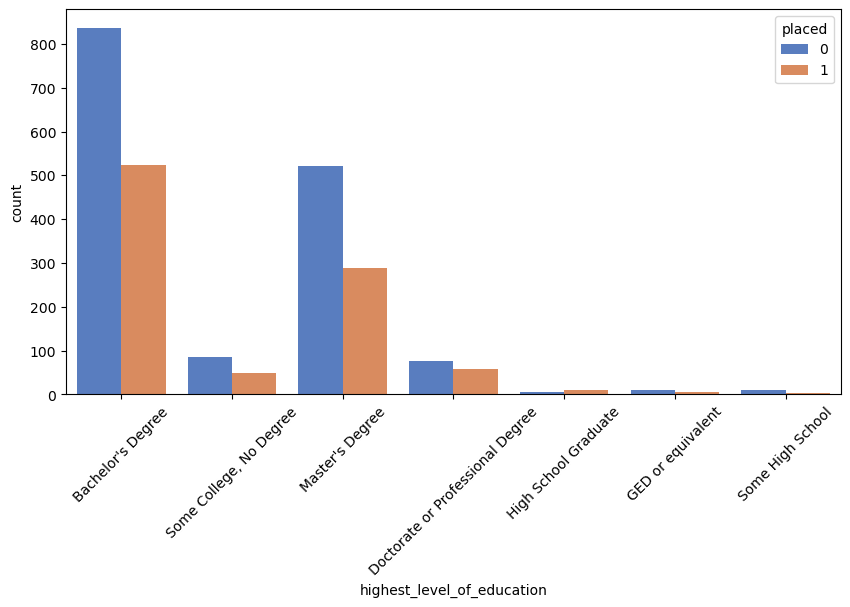

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='highest_level_of_education', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

### length_of_job_search  

length of a job search before joining the program

In [28]:
df['length_of_job_search'].value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

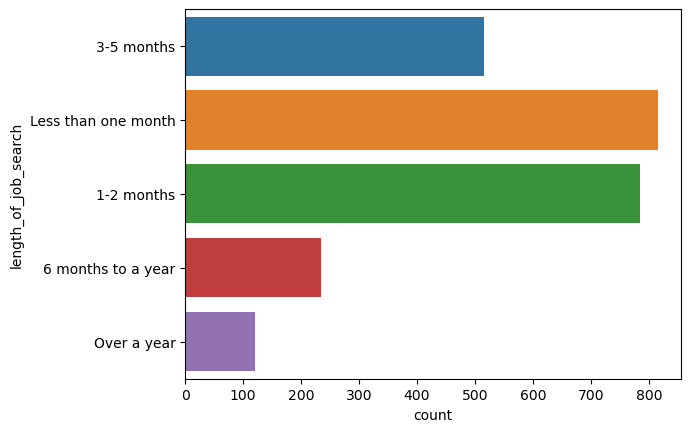

In [29]:
sns.countplot(y= 'length_of_job_search', data=df,  orient='v')
plt.show()

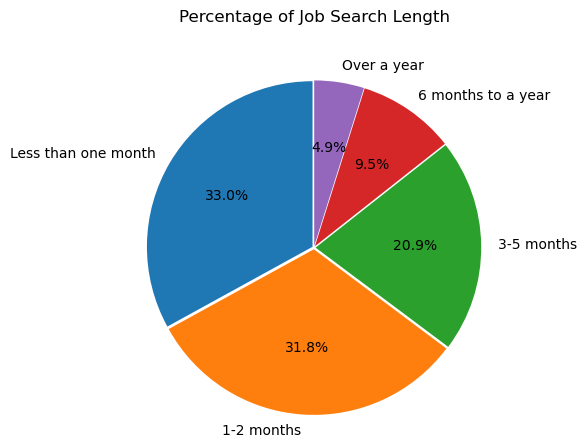

In [30]:
job_search_counts = df['length_of_job_search'].value_counts()
labels = job_search_counts.index
sizes = job_search_counts.values
explode = (0.01, 0.01, 0.01, 0.01, 0.01)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Job Search Length', pad=30)
plt.show()

### length_of_job_search and placed

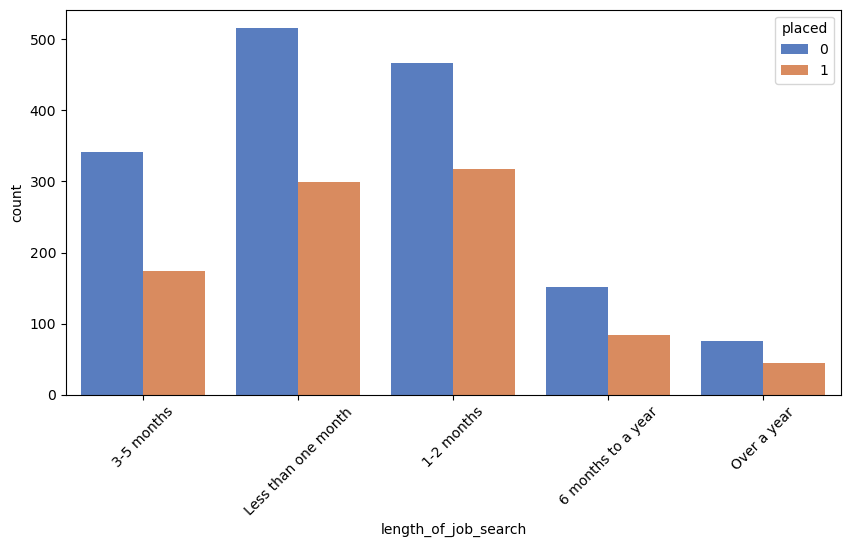

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='length_of_job_search', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

### biggest_challenge_in_search 

biggest challenge in a job search (self-reported)

In [32]:
df['biggest_challenge_in_search']

0            Hearing back on my applications
1        Getting past final round interviews
2       Figuring out which jobs to apply for
3        Getting past final round interviews
4            Hearing back on my applications
                        ...                 
2539                  Technical interviewing
2540         Hearing back on my applications
2541                  Technical interviewing
2542                  Technical interviewing
2543         Hearing back on my applications
Name: biggest_challenge_in_search, Length: 2544, dtype: object

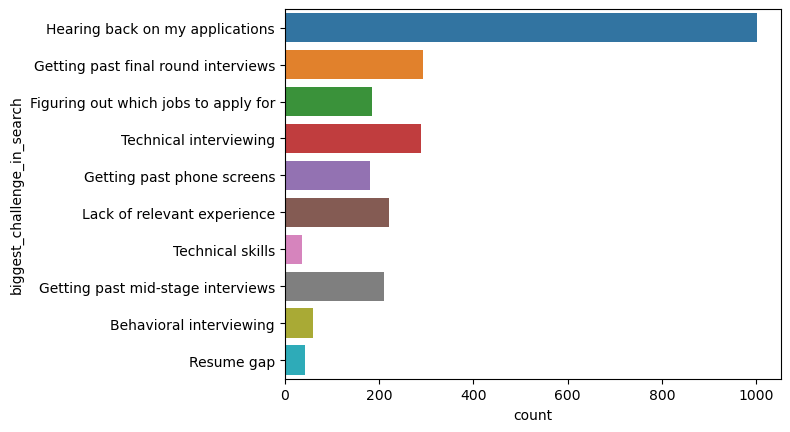

In [33]:
sns.countplot(y= 'biggest_challenge_in_search', data=df,  orient='v')
plt.show()

### biggest_challenge_in_search and placed

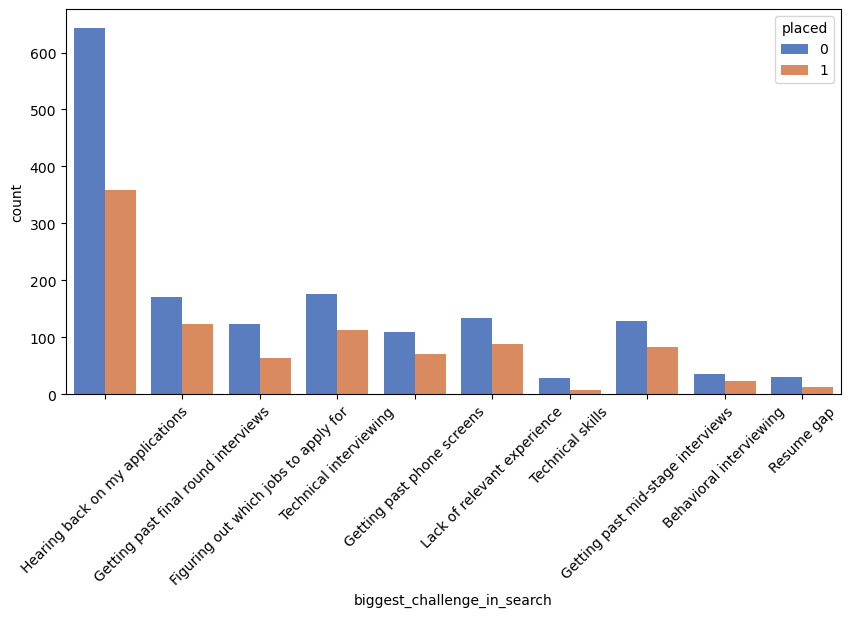

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='biggest_challenge_in_search', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

### professional_experienc

professional work exeperience before joining the program

In [35]:
df["professional_experience"].value_counts()

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: professional_experience, dtype: int64

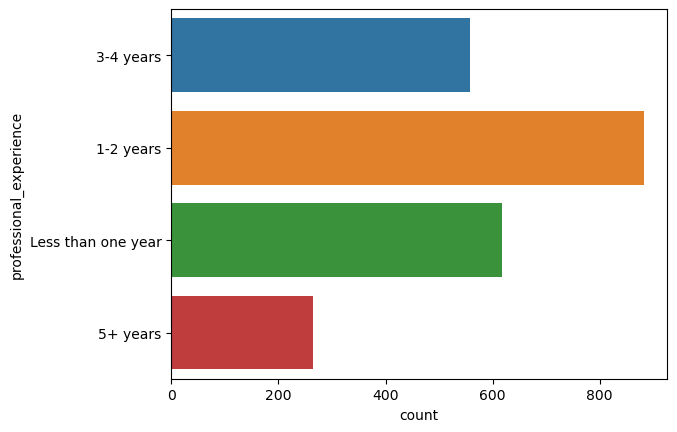

In [36]:
sns.countplot(y= 'professional_experience', data=df,  orient='v')
plt.show()

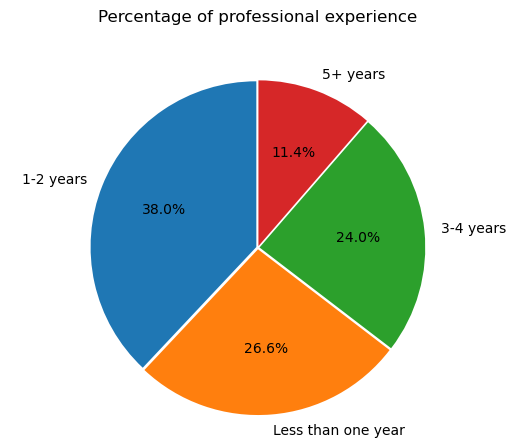

In [37]:
professional_experience = df['professional_experience'].value_counts()
labels = professional_experience.index
sizes = professional_experience.values
explode = (0.01, 0.01, 0.01, 0.01)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of professional experience', pad=30)
plt.show()

### professional_experience and placed

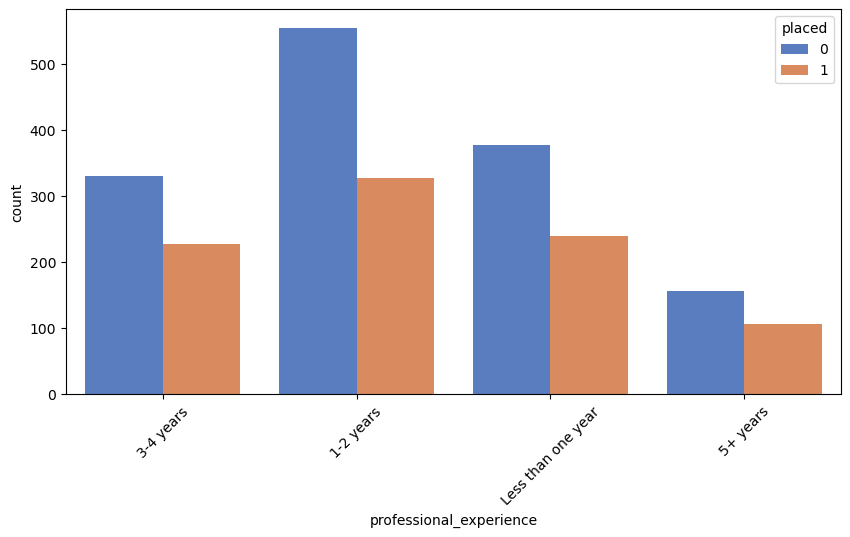

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='professional_experience', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

It seems that individuals with higher professional experience were more likely to be placed, while those with less experience had a higher number of non-placements.

### work_authorization_status

work authorization status before joining the program

In [39]:
df["work_authorization_status"].value_counts()

Citizen           1104
F1 Visa/OPT        644
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

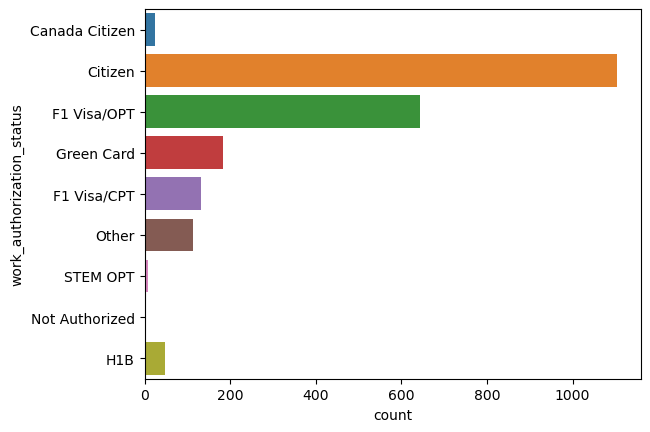

In [40]:
sns.countplot(y= 'work_authorization_status', data=df,  orient='v')
plt.show()

### work_authorization_status and placed

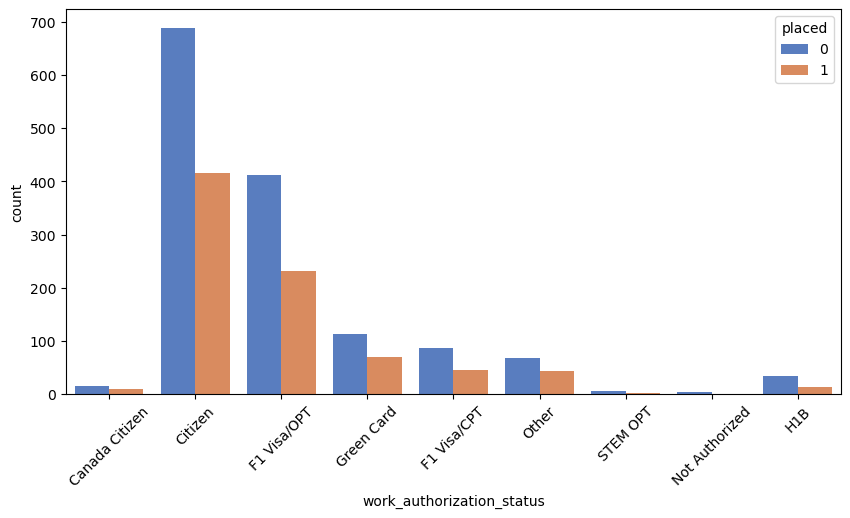

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='work_authorization_status', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

### number_of_interviews  

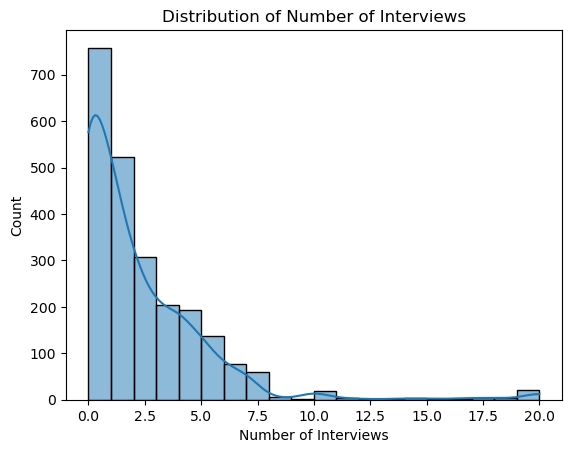

In [42]:
sns.histplot(data=df, x='number_of_interviews', bins=20, kde=True)
plt.xlabel('Number of Interviews')
plt.ylabel('Count')
plt.title('Distribution of Number of Interviews')
plt.show()

### number_of_interviews and placed

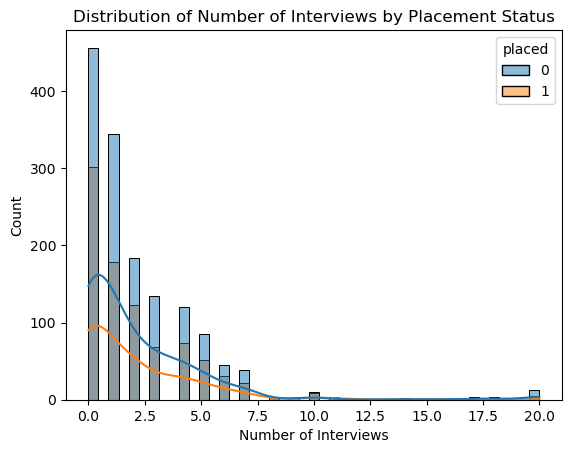

In [43]:
sns.histplot(data=df, x='number_of_interviews', hue='placed', kde=True)
plt.xlabel('Number of Interviews')
plt.title('Distribution of Number of Interviews by Placement Status')
plt.show()

This plot shows the distribution of the number of interviews for each placement status (placed or not placed) in the Pathrise dataset.From this plot, we can see that individuals who are placed tend to have a higher number of interviews compared to those who are not placed.

### number_of_applications 

number of applications before joining the program (self-reported)

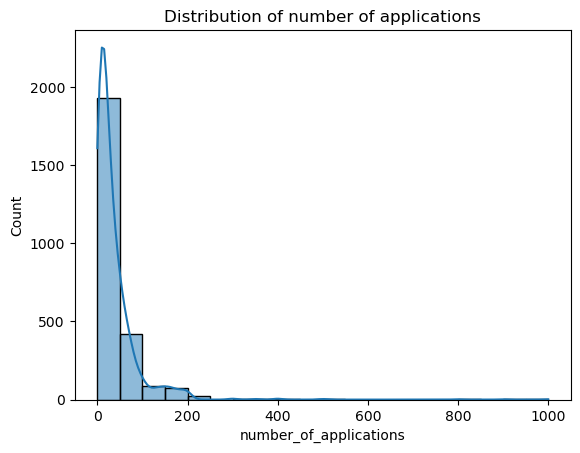

In [44]:
sns.histplot(data=df, x='number_of_applications', bins=20, kde=True)
plt.xlabel('number_of_applications')
plt.ylabel('Count')
plt.title('Distribution of number of applications')
plt.show()

### number_of_applications and placed

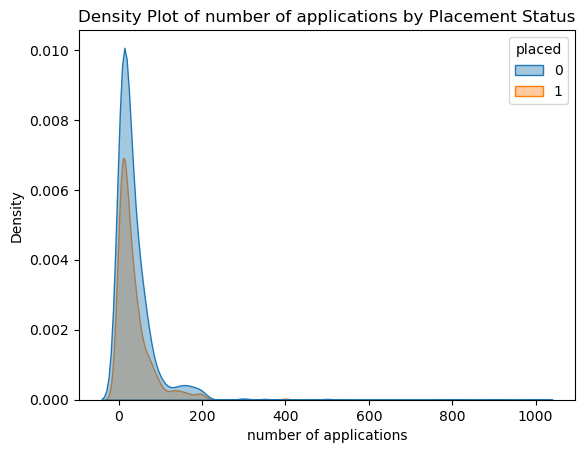

In [45]:
sns.kdeplot(data=df, x='number_of_applications', hue='placed', fill=True, alpha=0.4)
plt.xlabel('number of applications')
plt.title('Density Plot of number of applications by Placement Status')
plt.show()

The plot shows the distribution of the number of applications made by candidates based on their placement status. The plot indicates that the density of the number of applications is higher for candidates who did not get placed compared to those who got placed. It suggests that candidates who apply to a larger number of positions may not necessarily have a higher chance of getting placed.

### gender 

In [46]:
df['gender'].value_counts()

Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: gender, dtype: int64

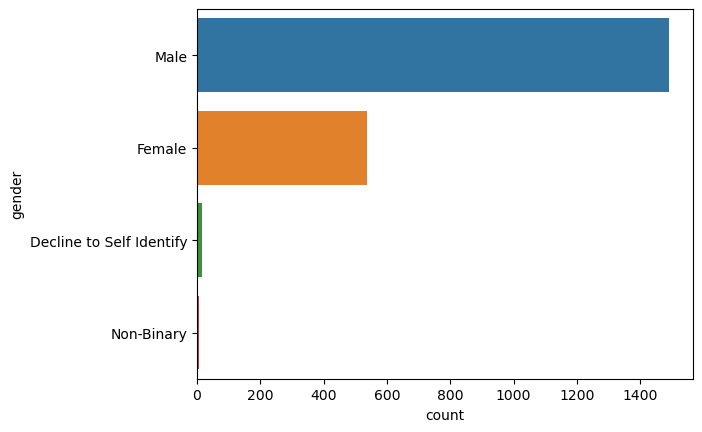

In [47]:
sns.countplot(y= 'gender', data=df,  orient='v')
plt.show()

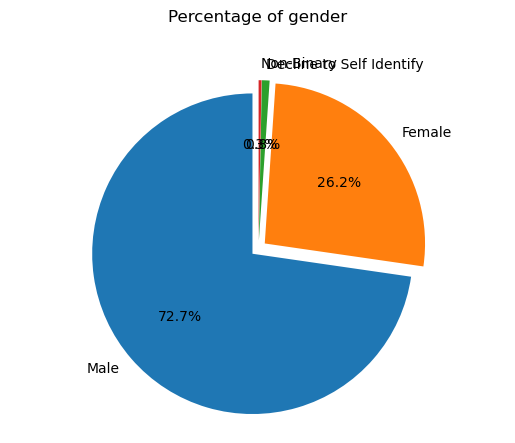

In [48]:
professional_experience = df['gender'].value_counts()
labels = professional_experience.index
sizes = professional_experience.values
explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the first slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of gender', pad=30)
plt.show()

### gender and placed

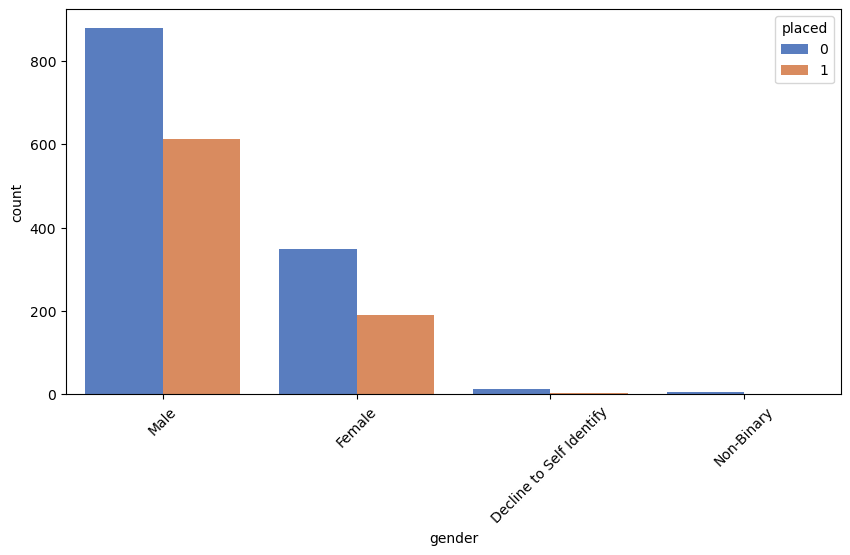

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='gender', hue='placed', palette='muted')

plt.xticks(rotation=45)
plt.show()

### race  

In [50]:
df['race'].value_counts()

East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

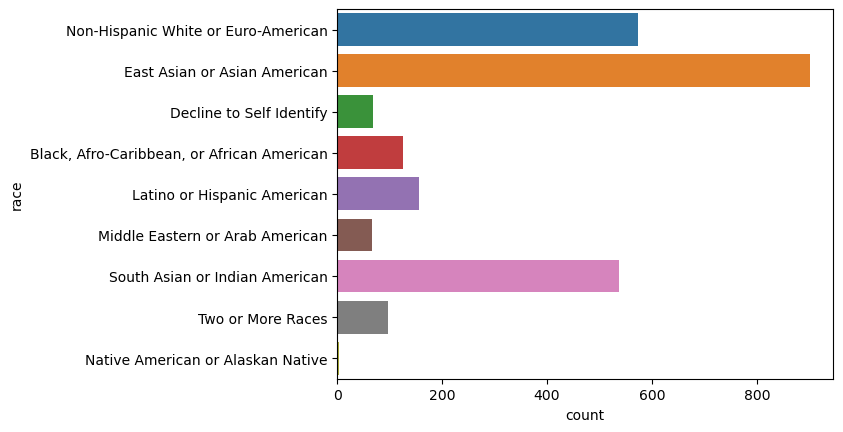

In [51]:
sns.countplot(y= 'race', data=df,  orient='v')
plt.show()

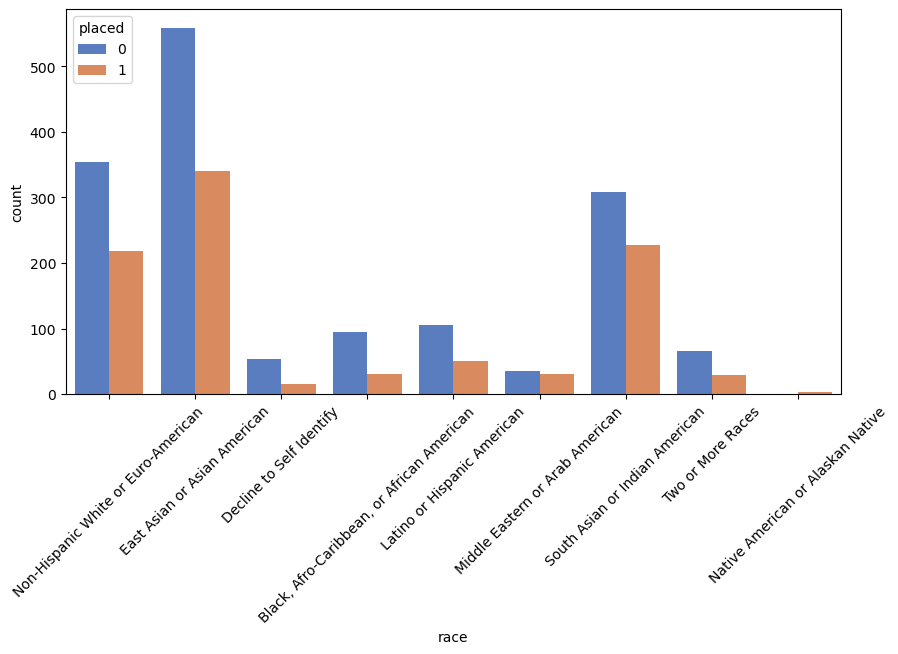

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='race', hue='placed', palette='muted' )

plt.xticks(rotation=45)
plt.show()

### placed

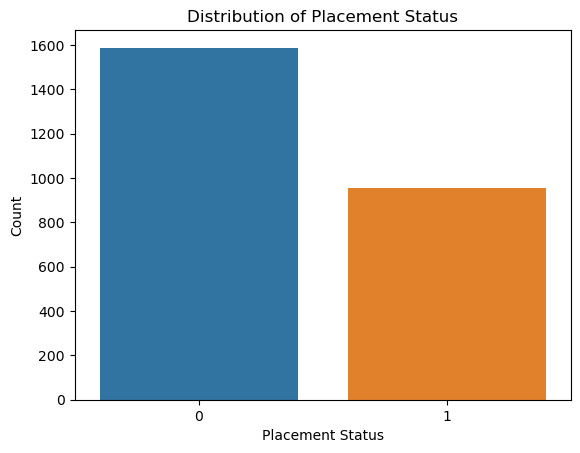

In [53]:
sns.countplot(data=df, x='placed')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.title('Distribution of Placement Status')
plt.show()

## Compare the features

### program_duration_days and number_of_applications

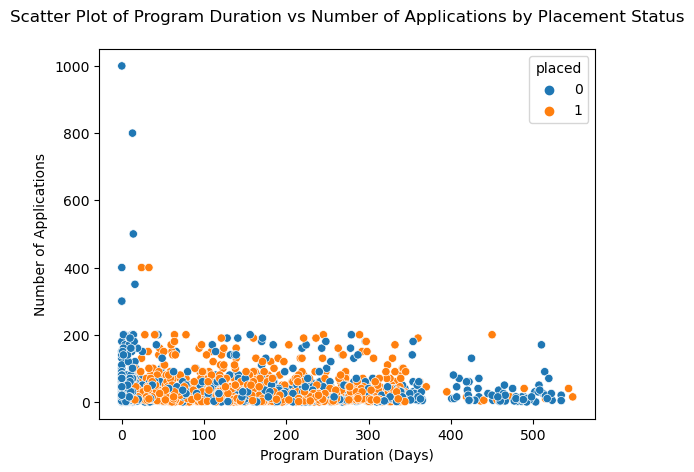

In [54]:
sns.scatterplot(x='program_duration_days', y='number_of_applications', hue='placed', data=df)
plt.xlabel('Program Duration (Days)')
plt.ylabel('Number of Applications')
plt.title('Scatter Plot of Program Duration vs Number of Applications by Placement Status' ,pad=20)
plt.show()

 There appears to be a weak positive relationship between program duration and number of applications, and candidates who were placed tend to have a higher number of applications regardless of program duration.
The hue represents placement status, where blue points indicate candidates who were not placed and orange points indicate those who were placed

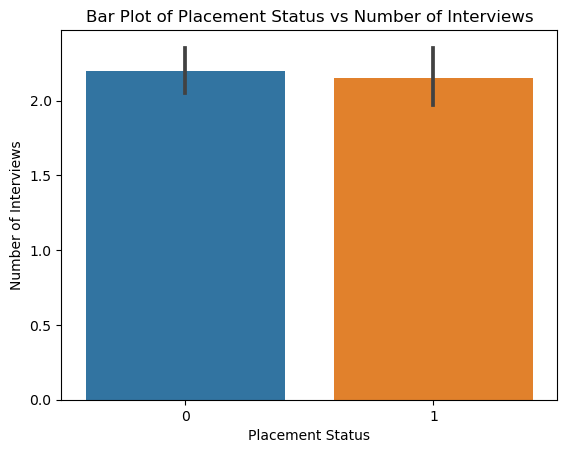

In [55]:
sns.barplot(x='placed', y='number_of_interviews', data=df)
plt.xlabel('Placement Status')
plt.ylabel('Number of Interviews')
plt.title('Bar Plot of Placement Status vs Number of Interviews')
plt.show()


From the plot, we can see that the average number of interviews is higher for the placed group compared to the not placed group. This suggests that a higher number of interviews might lead to a higher chance of getting placed in a job.The height of the bars represents the average number of interviews for each placement status.

### program_duration_days and number_of_interviews

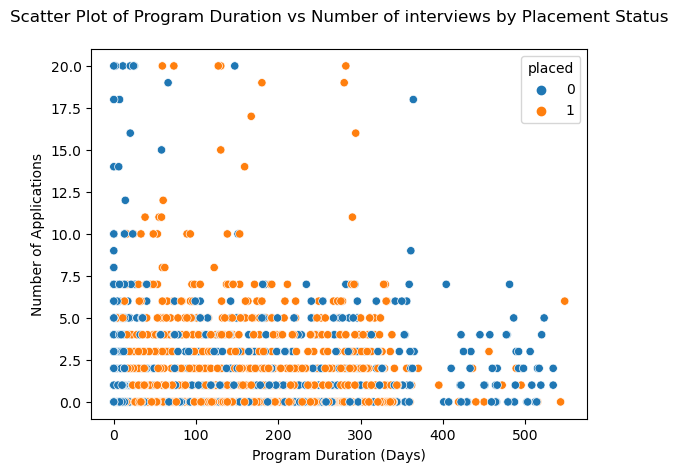

In [56]:
sns.scatterplot(x='program_duration_days', y='number_of_interviews', hue='placed', data=df)
plt.xlabel('Program Duration (Days)')
plt.ylabel('Number of Applications')
plt.title('Scatter Plot of Program Duration vs Number of interviews by Placement Status' ,pad=20)
plt.show()

The scatter plot shows the relationship between the program duration days and the number of interviews, colored by placement status. The plot suggests that students who have a higher number of interviews and longer program durations are more likely to be placed.